In [176]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2

from efficient_frontier import efficient_frontier

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [177]:
df = efficient_frontier.load_data(path="../efficient_frontier/data/Funds.csv")
df.head()

,Unnamed: 0,Dunamis Trading Fund,Lemvi Crypto AMC,Nickel Digital Asset Arbitrage SP - Institutional,SwissRex Crypto Fund,Cambrian Systematic Strategies LP,Postera Fund - Crypto I -EUR,Rivemont Crypto Fund Class F,ZeroBeta Digital Assets Fund,Pythagoras Token Fund LLC - US Fund,...,Tradecraft Crypto Asset Fund LP,Nickel Digital Gold SP - Institutional,Crypto Asset Fund - Class A,Bohr Arbitrage Crypto Fund LP,Nickel Digital Asset Fund SPC - Diversified Alpha SP,Layer1 Multi Manager Fund - Institutional Class S1,Aaro Distributed Ledger Technology Multifund IC SICAV Class B,Crypto Asset Fund - Class X,Arca Digital Asset Fund,Crown A Generix plc - LGT AI news-based Trading Sub-fund
0,Dec-19,-0.04%,NaN,0.34%,-11.56%,-3.79%,-4.95%,-10.98%,NaN,0.52%,...,-3.39%,NaN,NaN,NaN,NaN,-3.72%,NaN,NaN,2.09%,0.60%
1,Jan-20,1.51%,7.03%,0.81%,39.00%,20.36%,42.87%,26.57%,NaN,-3.35%,...,16.62%,NaN,NaN,NaN,NaN,8.57%,NaN,NaN,35.37%,1.10%
2,Feb-20,3.69%,6.68%,1.32%,19.60%,0.68%,-3.89%,-7.85%,NaN,11.61%,...,3.93%,NaN,NaN,NaN,NaN,-1.02%,NaN,NaN,-3.24%,-1.30%
3,Mar-20,2.46%,4.56%,0.09%,-14.32%,-3.58%,-35.85%,-21.56%,NaN,14.53%,...,-30.92%,NaN,NaN,NaN,NaN,-19.66%,NaN,NaN,-4.36%,0.20%
4,Apr-20,1.05%,5.45%,0.74%,30.77%,11.20%,29.67%,23.59%,NaN,0.65%,...,18.17%,NaN,NaN,NaN,NaN,8.57%,NaN,NaN,16.24%,3.00%


In [178]:
fund_names

['Dunamis Trading Fund',
 'Lemvi Crypto AMC',
 'Nickel Digital Asset Arbitrage SP - Institutional',
 'SwissRex Crypto Fund',
 'Cambrian Systematic Strategies LP',
 'Postera Fund - Crypto I -EUR',
 'Rivemont Crypto Fund Class F',
 'Pythagoras Token Fund LLC - US Fund',
 'Pantera Liquid Token Fund LP',
 'Pantera Early-Stage Token Fund Ltd',
 'Altana Digital Currency Fund',
 'Incrementum Digital & Physical Gold Fund - Class A USD',
 'Stylus Quantitative Cryptoasset Strategies LP',
 'Draco Digital Opportunities Fund Ltd',
 'Tellurian ExoAlpha Systematic Digital Asset Program',
 'Tradecraft Crypto Asset Fund LP',
 'Nickel Digital Gold SP - Institutional',
 'Bohr Arbitrage Crypto Fund LP',
 'Layer1 Multi Manager Fund - Institutional Class S1',
 'Aaro Distributed Ledger Technology Multifund IC SICAV Class B',
 'Arca Digital Asset Fund',
 'Crown A Generix plc - LGT AI news-based Trading Sub-fund']

In [179]:
fund_means

[3.4900000000000007,
 2.537826086956522,
 1.0056521739130435,
 14.918695652173914,
 7.676086956521739,
 9.361739130434781,
 8.408695652173913,
 2.648181818181818,
 17.21391304347826,
 17.49,
 11.835217391304347,
 4.636,
 7.856956521739131,
 4.024444444444445,
 10.122727272727273,
 10.383478260869564,
 13.026666666666666,
 3.891176470588236,
 11.188181818181818,
 11.895882352941177,
 16.026521739130434,
 1.4626086956521738]

In [180]:
df, fund_names, fund_means = efficient_frontier.pre_process_data(df)
df.head()

,Dunamis Trading Fund,Lemvi Crypto AMC,Nickel Digital Asset Arbitrage SP - Institutional,SwissRex Crypto Fund,Cambrian Systematic Strategies LP,Postera Fund - Crypto I -EUR,Rivemont Crypto Fund Class F,Pythagoras Token Fund LLC - US Fund,Pantera Liquid Token Fund LP,Pantera Early-Stage Token Fund Ltd,...,Stylus Quantitative Cryptoasset Strategies LP,Draco Digital Opportunities Fund Ltd,Tellurian ExoAlpha Systematic Digital Asset Program,Tradecraft Crypto Asset Fund LP,Nickel Digital Gold SP - Institutional,Bohr Arbitrage Crypto Fund LP,Layer1 Multi Manager Fund - Institutional Class S1,Aaro Distributed Ledger Technology Multifund IC SICAV Class B,Arca Digital Asset Fund,Crown A Generix plc - LGT AI news-based Trading Sub-fund
0,-0.04,2.537826,0.34,-11.56,-3.79,-4.95,-10.98,0.52,-12.43,-2.68,...,-1.6,4.024444,10.122727,-3.39,13.026667,3.891176,-3.72,11.895882,2.09,0.6
1,1.51,7.030000,0.81,39.00,20.36,42.87,26.57,-3.35,34.48,12.85,...,21.6,4.024444,19.800000,16.62,13.026667,3.891176,8.57,11.895882,35.37,1.1
2,3.69,6.680000,1.32,19.60,0.68,-3.89,-7.85,11.61,0.71,-7.28,...,10.1,4.024444,5.700000,3.93,13.026667,3.891176,-1.02,11.895882,-3.24,-1.3
3,2.46,4.560000,0.09,-14.32,-3.58,-35.85,-21.56,14.53,-33.61,-10.34,...,3.1,4.024444,56.400000,-30.92,13.026667,3.891176,-19.66,11.895882,-4.36,0.2
4,1.05,5.450000,0.74,30.77,11.20,29.67,23.59,0.65,31.50,22.90,...,3.2,4.024444,35.200000,18.17,13.026667,3.891176,8.57,11.895882,16.24,3.0


In [181]:
ef_df, portfolio_stds, portfolio_returns = efficient_frontier.efficient_frontier(df, fund_names, fund_means, 200)
ef_df

,Dunamis Trading Fund,Lemvi Crypto AMC,Nickel Digital Asset Arbitrage SP - Institutional,SwissRex Crypto Fund,Cambrian Systematic Strategies LP,Postera Fund - Crypto I -EUR,Rivemont Crypto Fund Class F,Pythagoras Token Fund LLC - US Fund,Pantera Liquid Token Fund LP,Pantera Early-Stage Token Fund Ltd,...,Stylus Quantitative Cryptoasset Strategies LP,Draco Digital Opportunities Fund Ltd,Tellurian ExoAlpha Systematic Digital Asset Program,Tradecraft Crypto Asset Fund LP,Nickel Digital Gold SP - Institutional,Bohr Arbitrage Crypto Fund LP,Layer1 Multi Manager Fund - Institutional Class S1,Aaro Distributed Ledger Technology Multifund IC SICAV Class B,Arca Digital Asset Fund,Crown A Generix plc - LGT AI news-based Trading Sub-fund
0,7.551237,6.666967,2.768346,5.644864,5.363799,6.346006,1.954236,6.317386,3.769649,7.126158,...,7.756221,5.376366,6.456138,2.279491,0.563820,4.385324,2.312321,1.002734,3.171952,5.451841
1,7.317665,1.408780,1.306927,6.507138,5.352556,1.808061,7.432437,2.898402,7.907946,1.999583,...,6.939868,5.769922,2.300212,6.560798,0.748722,5.752293,3.370029,5.420116,3.543883,7.916487
2,1.921744,2.443763,3.368859,4.896124,7.019721,3.191345,0.818303,5.359500,2.890572,0.670520,...,7.820581,4.115678,1.627818,5.128945,8.022468,7.570328,5.913384,6.059292,7.289927,5.038304
3,3.707318,0.269645,4.758901,6.199465,6.741377,3.530005,5.324331,6.983460,6.477419,3.224108,...,4.784898,4.007270,3.908707,6.371130,4.675765,5.019427,5.328442,1.457137,5.928525,6.528586
4,2.909214,2.047617,9.780941,9.533302,2.995529,7.178769,2.723141,1.411784,2.070523,5.838217,...,6.889274,0.579166,3.911585,3.387850,4.756574,5.676407,1.360970,7.859517,8.012951,1.393714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3.385133,9.743421,6.020506,0.064740,3.553887,2.332679,0.408336,6.262748,2.792145,1.834822,...,8.608732,3.436827,3.103126,1.100219,7.140669,9.910441,2.983973,13.176649,5.640691,4.010517
196,6.325635,7.012983,6.928721,1.429183,5.882943,1.694884,1.209692,7.657064,1.134144,1.533767,...,6.761740,0.584733,6.737627,2.290016,7.081942,5.833939,5.503115,0.578912,6.602673,8.139711
197,0.107017,4.723832,6.937666,6.350719,5.192189,2.908278,0.332379,2.523314,3.908320,7.269846,...,8.556936,5.771399,7.926797,2.083840,9.863505,3.998532,0.067732,6.720755,5.215922,6.688808
198,4.602545,7.997044,4.612963,8.085783,7.896339,2.529317,1.291834,2.844634,1.009247,5.476097,...,4.929939,0.509496,6.962574,1.856726,7.785847,6.178792,2.803966,6.871060,6.238947,8.011767


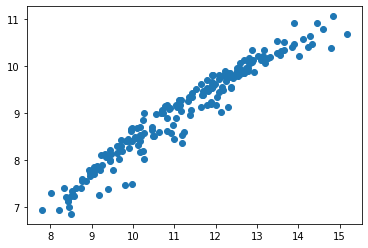

In [182]:
plt.scatter(portfolio_stds, portfolio_returns)